# Encontrando Expoplanetas com Python e dados da NASA

**Bibliotecas Utilizadas**

* **Lightkurve** ([https://lightkurve.github.io/lightkurve/](https://lightkurve.github.io/lightkurve/))

**Configuração Inicial**

In [73]:
import lightkurve as lk
from lightkurve import search_targetpixelfile
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Analisando a Estrela de Tabby (KIC 8462852)

Nesta seção, demonstramos como analisar dados do telescópio Kepler para estudar trânsitos planetários e anomalias estelares, usando como exemplo a famosa Estrela de Tabby (KIC 8462852).

### 1.1 Obtenção dos dados da Estrela de Tabby

Vamos trabalhar com a KIC 8462852, famosa por seus misteriosos padrões de escurecimento.

In [2]:
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download(quality_bitmask='hardest')

**Explicação do código acima**

1. `search_targetpixelfile("KIC 8462852", quarter=16)` - Busca um arquivo de *pixel* de alvo (*Target Pixel File - TFP*) do telescópio Kepler para:
    * O objeto com ID 8462852 (Famosa "Estrela de Tabby" ou KIC 8462852)
    * O trimestre 16 (quarter=16) dos dados da missão Kepler
2. `download(quality_bitmask='hardest')` efetua o *download* do arquivo aplicano um filtro de qualidade mais rigoroso ('hardest'), que remove todos os pixels/data points com possíveis problemas de qualidade;
3. O resultado é armazenado na variável `pixelfile`.

#### 1.1.1 Visualização dos dados Brutos

Primeiro vamos visualizar o frame inicial do Target Pixel File:

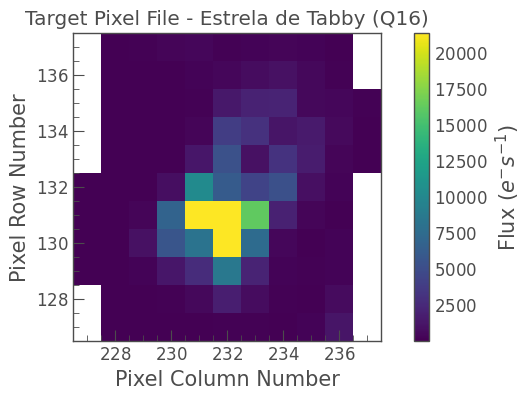

In [3]:
pixelfile.plot(frame=1)
plt.title('Target Pixel File - Estrela de Tabby (Q16)')
plt.show()

### 1.2 Criando uma Curva de Luz

Convertemos os pixels para uma curva de luz combinando todos os pixels válidos:

In [4]:
lc = pixelfile.to_lightcurve(aperture_mask='all');

**Parâmetros**:

- `apperture_mask='all'` - Usa todos os pixels para calcular o fluxo
- O resultado é armazenado na variável `lc`(light curve object)

#### 1.2.1 Visualização da Curva de Luz

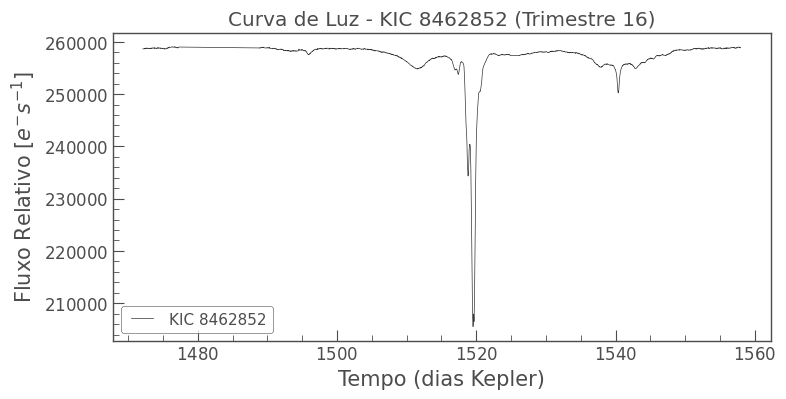

In [5]:
lc.plot()
plt.title('Curva de Luz - KIC 8462852 (Trimestre 16)')
plt.ylabel('Fluxo Relativo [$e^{-}s^{-1}$]')
plt.xlabel('Tempo (dias Kepler)')
plt.show()

### 1.3 Análise Inicial

Podemos observar:
- Variações de brilho características
- Possíveis eventos de escurecimento
- Padrões que mecerem investigação mais detalhada

### 1.4 Próximos Passos

Análises que podem ser realizadas:
1. Detecção de trânsitos planetários
2. Busca por padrões periódicos
3. Análise das misteriosas reduções de brilho
4. Comparação com outros trimestres

## 2. Análise do sistema estelar KIC 6922244

A **KIC 6922244** (também conhecida como **KOI-500**) é um sistema estelar interessante estudado pela missão Kepler da NASA, principalmente por abrigar um **sistema planetário compacto** com múltiplos exoplanetas.

In [41]:
pixelfile = search_targetpixelfile('KIC 6922244', quarter=1).download(quality_bitmask='hardest')

In [42]:
lc = pixelfile.to_lightcurve(aperture_mask=pixelfile.pipeline_mask)

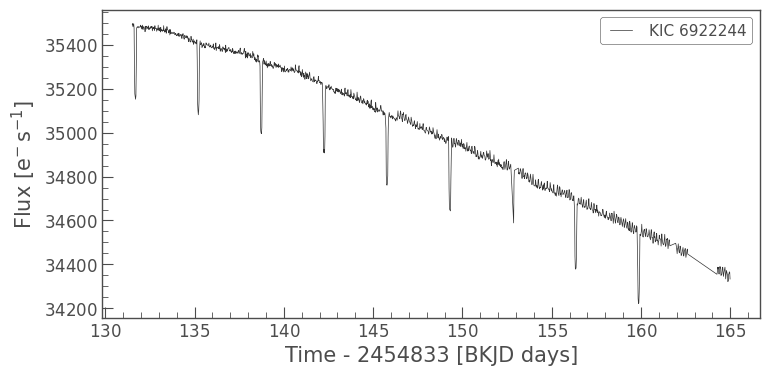

In [43]:
lc.plot();
plt.show()

In [46]:
flat_lc = lc.flatten(window_length=101)

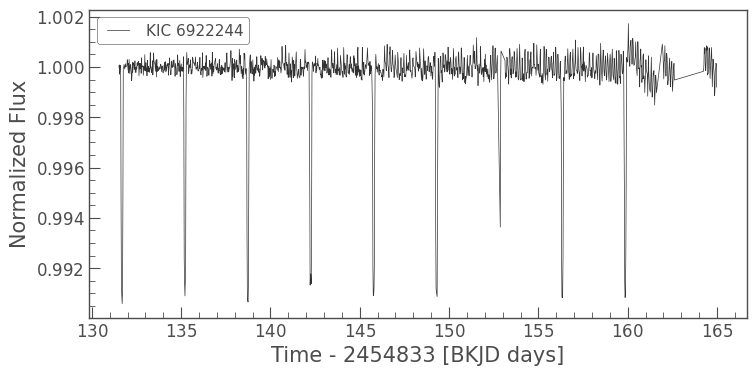

In [47]:
flat_lc.plot();
plt.show()

In [48]:
folded_lc = flat_lc.fold(period=3.5225)

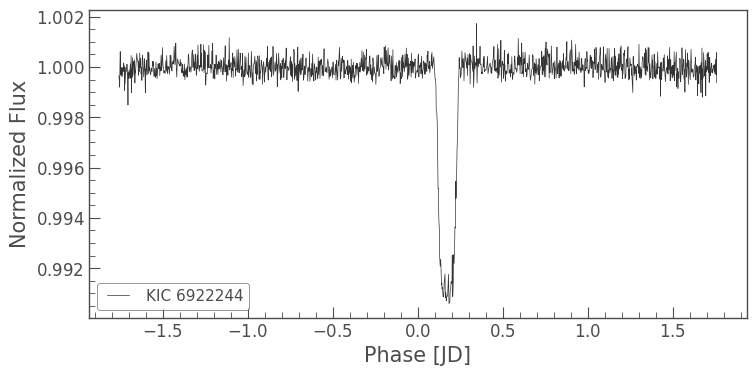

In [49]:
folded_lc.plot();
plt.show()

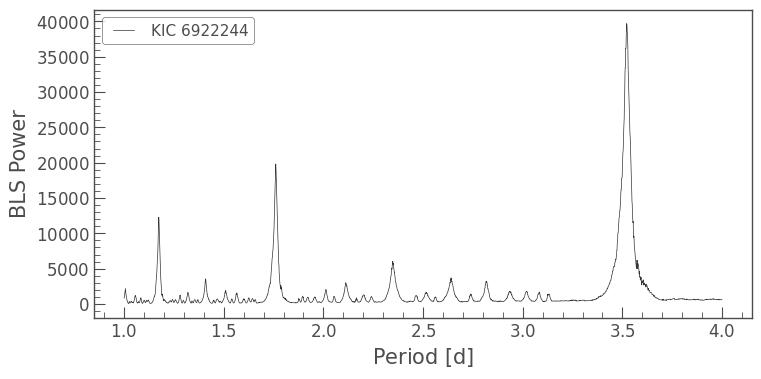

In [51]:
periodogram = flat_lc.to_periodogram(
    method="bls", 
    period=np.arange(1, 4, 0.001))
periodogram.plot();
plt.show()

In [54]:
best_fit_period = periodogram.period_at_max_power
print(f"Período de Melhor Ajuste: {best_fit_period:.5f}")

Período de Melhor Ajuste: 3.52100 d


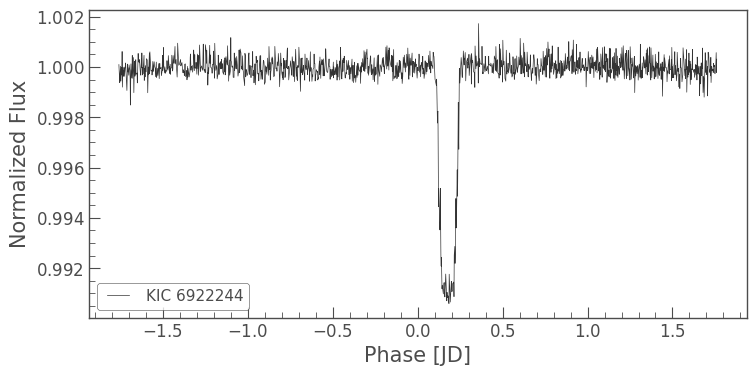

In [63]:
period = float(best_fit_period.value)
folded_lc = flat_lc.fold(period=period)
folded_lc.plot()
plt.show()

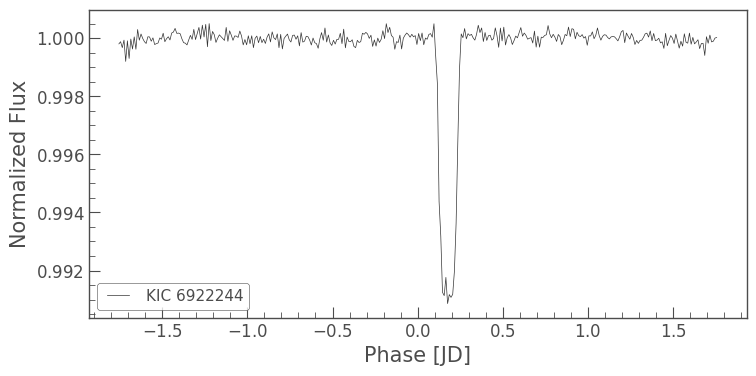

In [67]:
binned_lc = folded_lc.bin(time_bin_size=0.01*u.day)
binned_lc.plot()
plt.show()

## Análise de EPIC 212593538

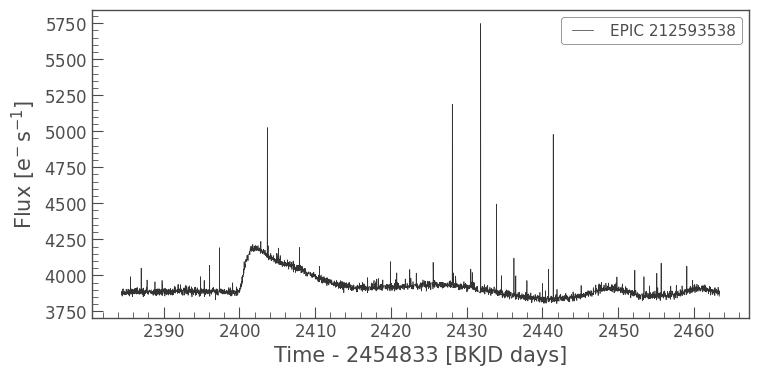

In [72]:
tpf = search_targetpixelfile('EPIC 212593538', campaign=6).download()
lc = tpf.to_lightcurve(aperture_mask='all')
lc.plot();
plt.show();

## Pi Mensae

In [85]:
search_result = search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)
tpf = search_result.download(quality_bitmask='default')

/mnt/Dados/Github/costandrad/projects/data-science/find-exoplanets-with-nasa-data-and-python/venv/lib/python3.12/site-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [86]:
tpf.targetid

261136679

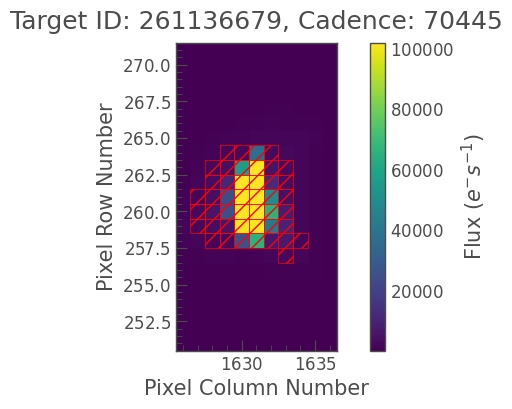

In [87]:
tpf.plot(aperture_mask=tpf.pipeline_mask)
plt.show()

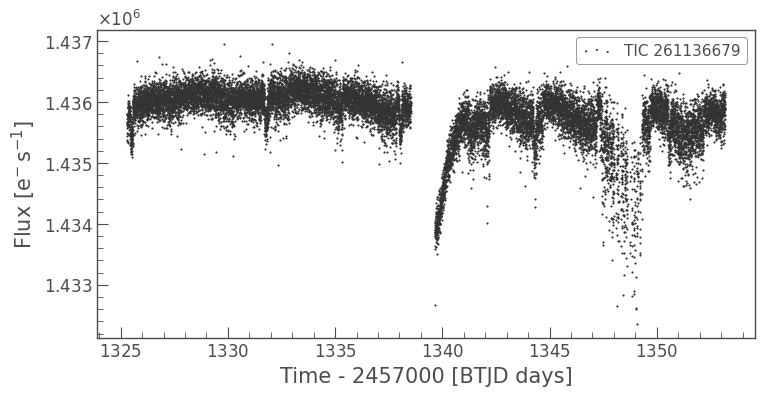

In [89]:
lc = tpf.to_lightcurve()
lc.scatter()
plt.show()

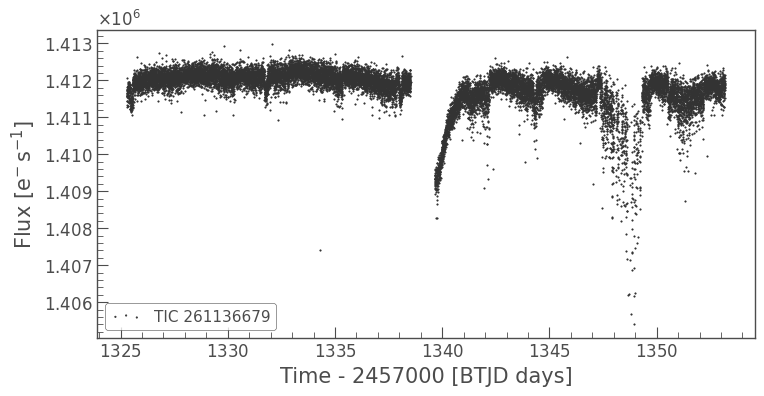

In [90]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.scatter()
plt.show()

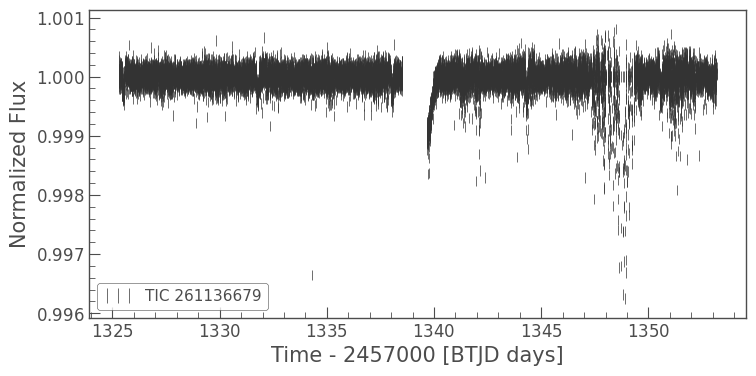

In [91]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar()
plt.show()

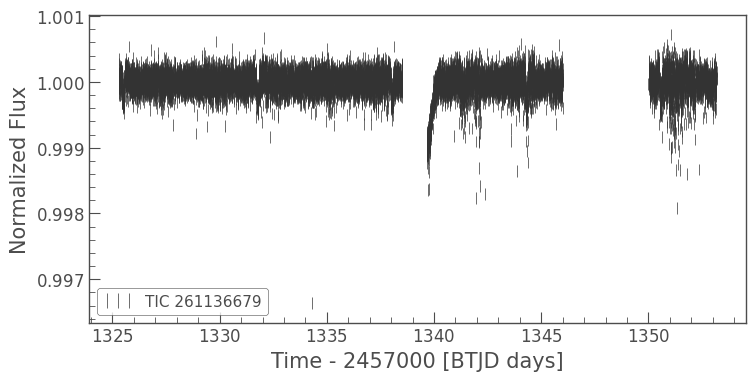

In [93]:
mask = (flat_lc.time.value < 1346) | (flat_lc.time.value > 1350)
masked_lc = flat_lc[mask]
masked_lc.errorbar()
plt.show()

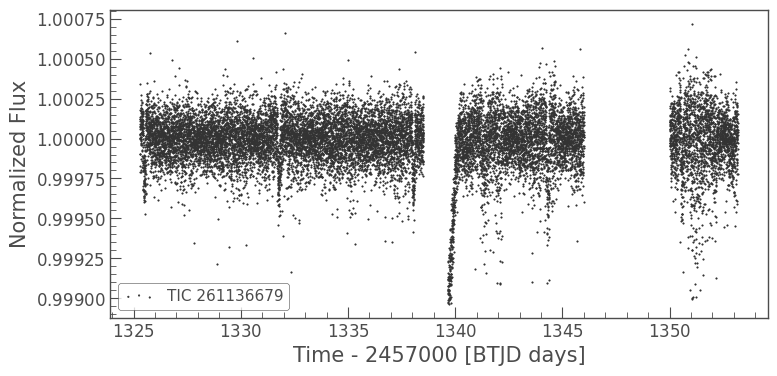

In [99]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.scatter()
plt.show()

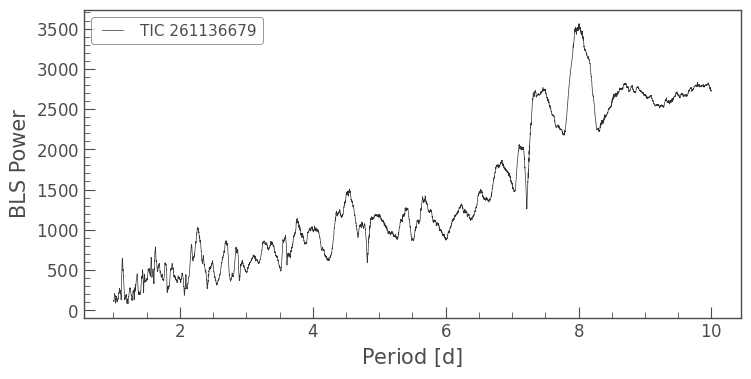

In [96]:
periodogram = clipped_lc.to_periodogram(method='bls', period=np.arange(1, 10, 0.001))
periodogram.plot()
plt.show()

In [97]:
best_fit_period = periodogram.period_at_max_power
print(f"Período de Melhor Ajuste {best_fit_period:.5f}")

Período de Melhor Ajuste 8.01000 d


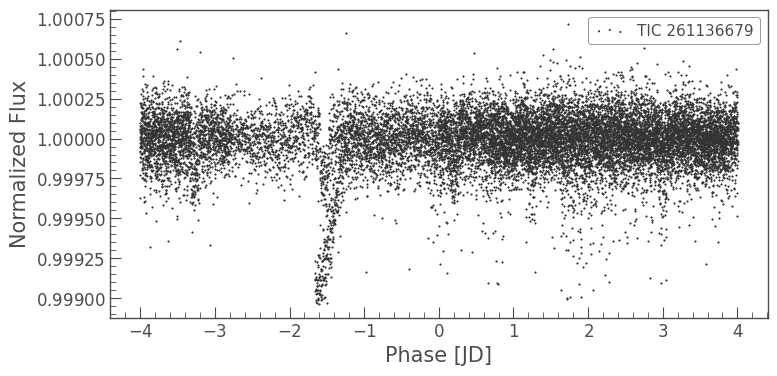

In [100]:
folded_lc = clipped_lc.fold(period=best_fit_period.value)
folded_lc.scatter()
plt.show()